<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
##### Your Code Here #####

#Import type of model & layers from keras
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [0]:
# Instantiate train/test data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [8]:
x_train.shape  # Get columns for input_dim

(404, 13)

In [81]:
# Instantiate the model
model = Sequential()

# Add layers to the model (1 hidden layer as base model)

# Normalization
model.add(BatchNormalization())
# Input -> Hidden
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
# Hidden
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))
# Hidden
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# Hidden
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
# Hidden -> Output
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mse']
)

# Fit model
model_1 = model.fit(x_train, y_train, epochs=1000, batch_size=10)

# Inspect architecture
model.summary()

Train on 404 samples
Epoch 1/1000
404/404 [==============================] - 1s 1ms/sample - loss: 554.6363 - mean_squared_error: 554.6362
Epoch 2/1000
404/404 [==============================] - 0s 252us/sample - loss: 478.3484 - mean_squared_error: 478.3484
Epoch 3/1000
404/404 [==============================] - 0s 249us/sample - loss: 285.4563 - mean_squared_error: 285.4563
Epoch 4/1000
404/404 [==============================] - 0s 249us/sample - loss: 183.3029 - mean_squared_error: 183.3029
Epoch 5/1000
404/404 [==============================] - 0s 260us/sample - loss: 152.1742 - mean_squared_error: 152.1742
Epoch 6/1000
404/404 [==============================] - 0s 253us/sample - loss: 168.5128 - mean_squared_error: 168.5128
Epoch 7/1000
404/404 [==============================] - 0s 250us/sample - loss: 132.2616 - mean_squared_error: 132.2617
Epoch 8/1000
404/404 [==============================] - 0s 242us/sample - loss: 134.9558 - mean_squared_error: 134.9558
Epoch 9/1000
404/404 

In [82]:
model.evaluate(x_test, y_test)[1]

102/102 [==============================] - 0s 5ms/sample - loss: 38.4352 - mean_squared_error: 38.4352


38.435173

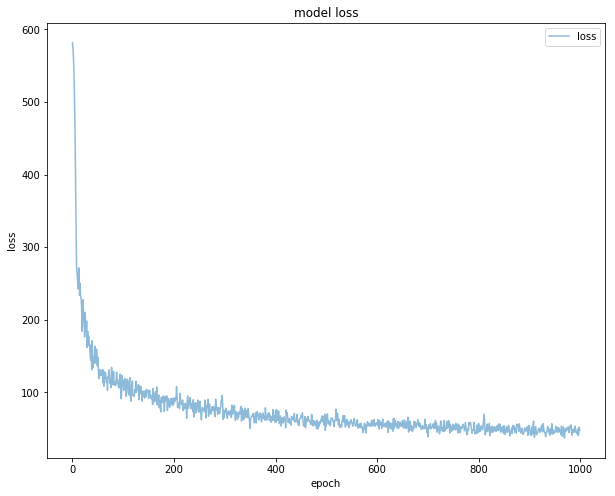

In [59]:
# Plot model loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'], alpha=0.5)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show();

In [0]:
# Compare to linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [0]:
lr = LinearRegression(normalize=True, n_jobs=-1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [56]:
mean_squared_error(y_test, y_pred)  # Sad face D,:

23.195599256422977

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7213535934621553

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(45)

In [84]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(60000, -1).astype('float32')
X_test = X_test.reshape(10000, -1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 784) y_train shape: (60000, 10)


In [103]:
mnist_model = Sequential()
# Optimizer
sgd = keras.optimizers.SGD(learning_rate=0.02, momentum=0.86, nesterov=False)

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
mnist_model.add(Dropout(.20))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(.20))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(.20))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(.20))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 16)                12560     
_________________________________________________________________
dropout_77 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_129 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_78 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_79 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 16)              

In [104]:
history = mnist_model.fit(X_train, y_train, validation_split=0.25, 
                          batch_size=512, epochs=1000)
scores = mnist_model.evaluate(X_test, y_test)

Train on 45000 samples, validate on 15000 samples
Epoch 1/1000
45000/45000 [==============================] - 2s 52us/sample - loss: 2.0381 - acc: 0.2448 - val_loss: 1.4124 - val_acc: 0.6320
Epoch 2/1000
45000/45000 [==============================] - 1s 17us/sample - loss: 1.5438 - acc: 0.4233 - val_loss: 0.9469 - val_acc: 0.6970
Epoch 3/1000
45000/45000 [==============================] - 1s 18us/sample - loss: 1.2647 - acc: 0.5120 - val_loss: 0.8037 - val_acc: 0.7270
Epoch 4/1000
45000/45000 [==============================] - 1s 20us/sample - loss: 1.1251 - acc: 0.5606 - val_loss: 0.7383 - val_acc: 0.7452
Epoch 5/1000
45000/45000 [==============================] - 1s 16us/sample - loss: 1.0508 - acc: 0.5893 - val_loss: 0.7125 - val_acc: 0.7545
Epoch 6/1000
45000/45000 [==============================] - 1s 17us/sample - loss: 0.9916 - acc: 0.6124 - val_loss: 0.6951 - val_acc: 0.7607
Epoch 7/1000
45000/45000 [==============================] - 1s 17us/sample - loss: 0.9502 - acc: 0.6345 

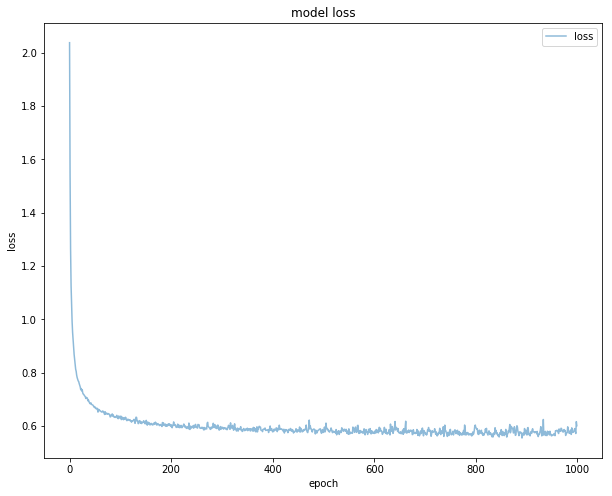

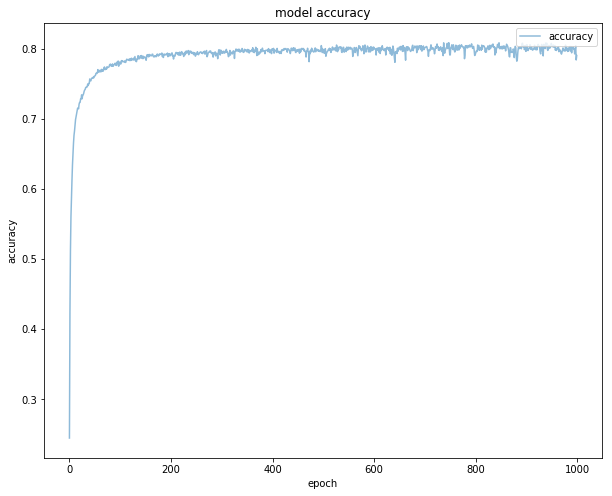

In [105]:
# Plot model loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], alpha=0.5)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show();

#Plot model accuracy
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'], alpha=0.5)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'mse'], loc='upper right')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.